In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
Readerdf = pd.read_csv("ReaderDemos2.csv")

In [6]:
Readerdf.shape


(2832, 14)

In [8]:
Readerdf.columns


Index(['Age', 'Sex', 'Race', 'Marital status?', 'Education', 'Employement',
       'Incomes', 'How many books did you read during last 12months?',
       'Read any printed books during last 12months?',
       'Read any audiobooks during last 12months?',
       'Read any e-books during last 12months?', 'Last book you read, you…',
       'Do you happen to read any daily news or newspapers?',
       'Do you happen to read any magazines or journals?'],
      dtype='object')

In [9]:
Readerdf.head()

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No


#Racial Breakdown (2017) = 60.1% White, 12.2% Black, 5.6% Asian, 18.5% Hispanic/Latinx, 3.6% Other
#Source: https://www.visualcapitalist.com/visualizing-u-s-population-by-race/
#This Data Set is "Imbalanced" for white Respondants (Over Rep), and Asian Respondants (under Rep), Hispanic/Latinx Not included all up (maybe included in "White" as Hispanic/Latinx is not technically a racial category, but an ethnic one) 
#So, Let's work on doublingt Asian Rep in Data Set

In [10]:
Readerdf.Race.value_counts()

White                              2217
Black or African-American           347
Asian or Pacific Islander            70
Mixed race                           63
Other                                58
Refused                              37
Native American/American Indian      31
Don’t know                            9
Name: Race, dtype: int64

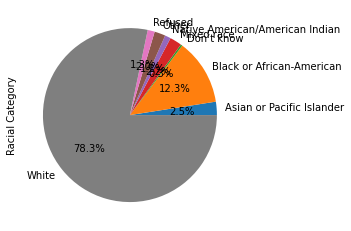

In [12]:
Readerdf.groupby('Race').size().plot(kind='pie',
                                       y = "Race",
                                       label = "Racial Category",
                                       autopct='%1.1f%%')

In [17]:
NAdf = Readerdf[Readerdf.Race != "Asian or Pacific Islander"]
Adf = Readerdf[Readerdf.Race == "Asian or Pacific Islander"]

In [18]:
NAdf.shape

(2762, 14)

In [19]:
Adf.shape

(70, 14)

In [20]:
from sklearn.utils import resample
A_upsample = resample(Adf,
             replace=True,
             n_samples=(len(Adf)*2),
             random_state=42)
print(A_upsample.shape)

(140, 14)


In [21]:
Readerdf2 = pd.concat([NAdf,A_upsample])

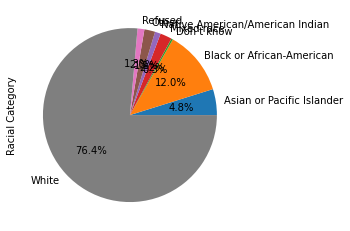

In [22]:
Readerdf2.groupby('Race').size().plot(kind='pie',
                                       y = "Race",
                                       label = "Racial Category",
                                       autopct='%1.1f%%')

In [24]:
Readerdf2.columns

Index(['Age', 'Sex', 'Race', 'Marital status?', 'Education', 'Employement',
       'Incomes', 'How many books did you read during last 12months?',
       'Read any printed books during last 12months?',
       'Read any audiobooks during last 12months?',
       'Read any e-books during last 12months?', 'Last book you read, you…',
       'Do you happen to read any daily news or newspapers?',
       'Do you happen to read any magazines or journals?'],
      dtype='object')

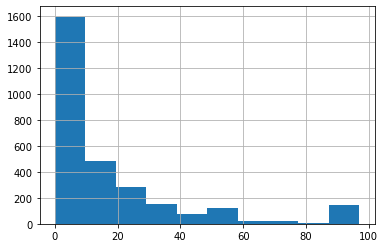

In [26]:
Readerdf2['How many books did you read during last 12months?'].hist()

In [27]:
Readerdf2['How many books did you read during last 12months?'].median()

6.0

#More Comfortable with This Distribution for Asian, let's write this out 

In [23]:
Readerdf2.to_csv('ReaderDemosUpped.csv')